# Милюта Евгения, 517.

## Как соотносятся AUC ROC и максимально достижимая точность?

Рассмотрим случай, когда ответы алгоритма имеют унимодальные распределения по классам.

In [58]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [135]:
pos = random.beta(16, 8, 10000)
neg = random.beta(2, 8, 90000)

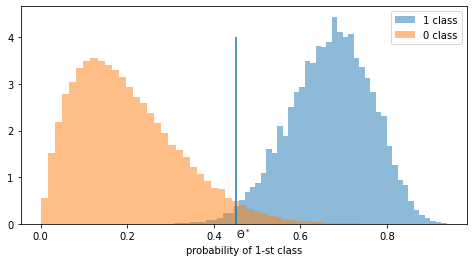

In [136]:
plt.figure(figsize=(8,4))
plt.hist(pos, bins=50, density=True, alpha=0.5,label="1 class")
plt.hist(neg, bins=50, density=True, alpha=0.5, label="0 class")
plt.vlines(0.45, 0, 4)
plt.text(0.45, -0.3, "$\Theta^*$" )
plt.legend()
plt.xlabel("probability of 1-st class")
plt.show()

$$\text{Пусть распределение первого класса имеет плотность} - f(\theta), ~\text{второго - }g(\theta) $$
$$TP = \int_{\theta}^1 f(t)dt = F_1(\theta)$$
$$FP = \int_{\theta}^1 g(t)dt = G_1(\theta)$$
$$TN = \int_0^{\theta} g(t)dt = G_0(\theta)$$
$$FN = \int_0^{\theta} f(t)dt = F_0(\theta)$$

$$TP + FN = 1$$
$$FP + TN = 1$$

$$TPR = \frac{F_1(\theta)}{F_1(\theta)+ F_0(\theta)} = F_1(\theta)$$

$$FPR = \frac{G_1(\theta)}{G_1(\theta)+ G_0(\theta)} = G_1(\theta)$$

$$Acc = \frac{F_1(\theta)+ G_0(\theta)}{2} = \frac{F_1(\theta)- G_1(\theta) +1}{2} \to_{\theta} max$$

Стоит отметить, что максмальное значение accuracy будет с точностью до линейных преобразований равно максимуму Kolmogorov Smirnov chart.

$$Acc' = \frac{- f(\theta) + g(\theta)}{2} = 0 ~~\Rightarrow~~$$

оптимальный порог согласно Accuracy находится из:

$$g(\theta^*) = f(\theta^*)$$


Графически это будет точкой пересечения двух плотностей (оптимальный порог бинаризации показан на графике вертикальной чертой).



С другой стороны:
$$Acc = \frac{TPR - FPR}{2} + 0.5$$

$$2\times Acc - 1 = TPR - FPR$$

Если посмотреть на максимизацию $Accuracy$ на плоскости $TPR - FPR$, получается, что мы сдвигаем прямую $TPR = FPR + C$ до предельно возможного уровня наверх. Выходит, что проведя такую прямую как касательную к $ROC$ кривой, получим точку касания, в которой будет лежать наши $TPR$ и $FPR$ при оптимальном пороге $\theta^*$.

In [163]:
from sklearn import metrics
y_true = [0,0,0,1,0,1,1,0,1,1,1,0,1,1]
scores = [0.1,0.2,0.5, 0.9,0.8,0.6, 0.7,0.1,0.45,0.65, 0.9,0.2,0.74,0.37]
fpr, tpr, thresholds = metrics.roc_curve(y_true, scores, pos_label=1)

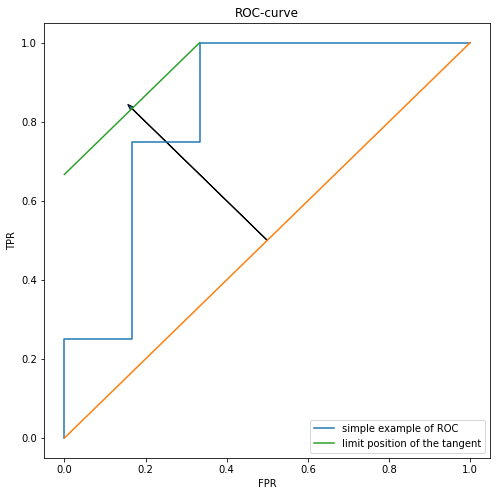

In [191]:
plt.figure(figsize=(8,8))
plt.title('ROC-curve')
plt.plot(fpr,tpr,label='simple example of ROC')
plt.plot([0,1],[0,1])
plt.arrow(0.5,0.5,-0.5+1/6,5/6 - 0.5, head_width = 0.01)
plt.plot([0, 0.3333], [1-0.3333, 1], label='limit position of the tangent')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()